/home/manishg/Research/NExG/


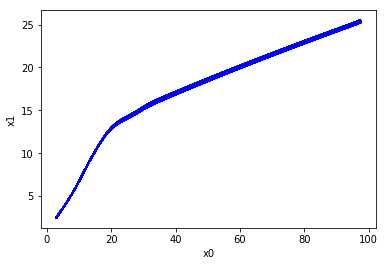

/home/manishg/Research/NExG/eval-emsoft/eval-gr/dconfigs_inv/d_object_ABSDisc
10
Avg vp is 0.007552587975050945
Max vp is 0.03924202881340412
/home/manishg/Research/NExG/eval-emsoft/eval-gr
Gradient: True
(205000, 10)
(184500, 10)
(184500, 3)
normalized

Setting the activation function to default - ReLU.

Epoch 1/30
2883/2883 [==============================] - 10s 4ms/step - loss: 0.2992 - accuracy: 0.7170 - mse: 0.1765
Epoch 2/30
2883/2883 [==============================] - 10s 4ms/step - loss: 0.2410 - accuracy: 0.7671 - mse: 0.1296
Epoch 3/30
2883/2883 [==============================] - 10s 4ms/step - loss: 0.2173 - accuracy: 0.7934 - mse: 0.1123
Epoch 4/30
2883/2883 [==============================] - 11s 4ms/step - loss: 0.2027 - accuracy: 0.8113 - mse: 0.1012
Epoch 5/30
2883/2883 [==============================] - 12s 4ms/step - loss: 0.1915 - accuracy: 0.8262 - mse: 0.0924
Epoch 6/30
2883/2883 [==============================] - 11s 4ms/step - loss: 0.1832 - accuracy: 0.8362 - mse

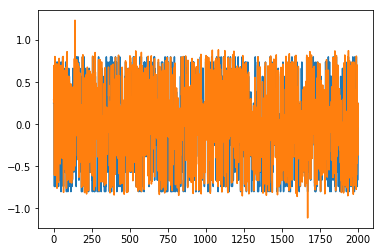

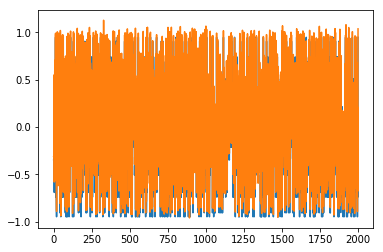

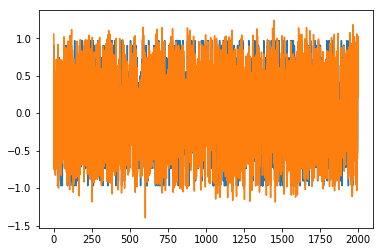

(20500, 3)
(20500, 3)


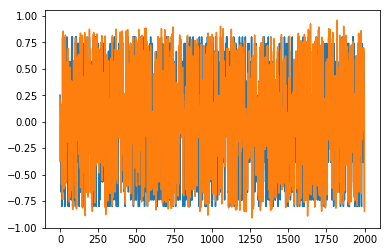

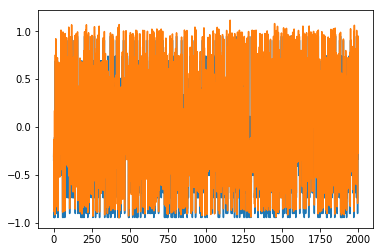

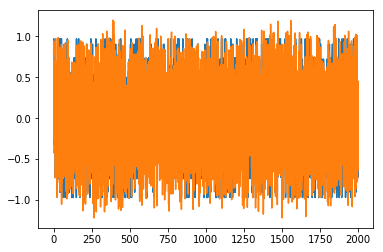

In [10]:
import matplotlib
%matplotlib inline

import os
nxg_path = os.environ.get('NXG_PATH')
print(nxg_path)

import sys
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')

from learningModule import DataConfiguration, CreateTrainNN

epochs = 30
dynamics = 'ABSDisc'
dataObject = DataConfiguration(dynamics=dynamics, gradient_run=True, dimensions=3, disc=True)
# dataObject.setNeighbors(5)
dataObject.setSteps(100)
dataObject.setSamples(50)
dataObject.setLowerBound([97.0, 25.2, -3.8])
dataObject.setUpperBound([97.5, 25.5, -4.0])
dataObject.generateTrajectories(scaling=0.01, dump_i_states=True)
dataObject.showTrajectories(xindex=0, yindex=1)
dataObject.createData(jumps=[1,2,5,7,11,13,17,19])
    
nnObject1 = CreateTrainNN(dynamics=dynamics, dnn_rbf='RBF')
nnObject1.createInputOutput(data_object = dataObject, inp_vars=['x','xp','vp','t'], out_vars=['v'])
nnObject1.setEpochs(epochs)
nnObject1.trainTestNN(optim='SGD', loss_fn='mae', layers=1, neurons=512)

In [1]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='ABSDisc')
evalObject.setSimsBound(30)
dataObject = evalObject.setDataObject()
# dataObject.setSteps(201)
# time_steps = [15, 33, 59, 71, 88, 104, 117, 140, 166, 192]

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 50
idx = 0
while idx < max_iter:
    dest_traj = dataObject.generateTrajectories(samples=1)[0]
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    time_steps = random.sample(range(30, 100), 5)
    print(time_steps)
    for time_step in time_steps:
        print(dest_traj[0], dest_traj[time_step])
        dest = dest_traj[time_step]
        dests = [dest]
        print(ref_traj[0], ref_traj[time_step])
        evalObject.reachDestInvSen(dests=dests, d_time_steps=[time_step], threshold=0.004, 
                        correction_steps = [2], scaling_factors=[0.5], i_state=[ref_traj[0]])
        f_sims = evalObject.getFSimulations()
        min_dist = evalObject.getFDistance()
        rel_dist = evalObject.getFRelDistance()
        if f_sims > 1 and rel_dist < 1.0:
            f_simulations.append(f_sims)
            min_dists.append(min_dist)
            rel_dists.append(rel_dist)
#         else:
#             print("** either f_iter is 1 or rel_dist is 1.0 **")
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_ABSDisc.txt
[73, 77, 91, 42, 93]
[97.0884191  25.2430097  -3.84574843] [11.32938201  7.70962425 -5.60434582]
[97.0093591  25.37636025 -3.8969554 ] [11.03321472  7.49982405 -5.46119926]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
73
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.39015654731748495
Final distance 0.0010410966633474545
Final relative distance 0.0026684075161765137
Min relative distance: 0.0026684075161765137
Min simulation: 4
Final simulation: 4
Time taken: 1.0710182189941406
[97.0884191  25.2430097  -3.84574843] [ 9.4179416   6.32880407 -4.35337804]
[97.0093591  25.37636025 -3.8969554 ] [ 9.17375724  6.16382015 -4.16750823]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
77
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correct

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
98
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.012790980094699683
Starting distance is very less 
Final distance 0.012790980094699683
Final relative distance 1.0
Min relative distance: 1.0
Min simulation: 1
Final simulation: 1
Time taken: 0.0002720355987548828
idx **** 3
[61, 71, 63, 57, 60]
[97.06404497 25.31790146 -3.84669929] [19.4383729  12.68416432 -5.70978491]
[97.09550729 25.257458   -3.80110844] [19.64018212 12.73516109 -5.44007873]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
61
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.3406890908939105
Final distance 0.000919817781853784
Final relative distance 0.0026998744792219144
Min relative distance: 0.0026998744792219144
Min simulation: 5
Final simulation: 5
Time taken

Final distance 0.0012331017935538384
Final relative distance 0.0015795757009249606
Min relative distance: 0.0015795757009249606
Min simulation: 4
Final simulation: 4
Time taken: 1.1399037837982178
[97.13588395 25.4049551  -3.94165183] [16.05306024 10.91173818 -6.82873038]
[97.49265646 25.27243409 -3.98359297] [16.71614054 11.28045519 -6.68601694]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
65
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7720070130728384
Final distance 0.0031542501682804724
Final relative distance 0.004085779163748181
Min relative distance: 0.004085779163748181
Min simulation: 6
Final simulation: 6
Time taken: 1.769798994064331
idx **** 6
[57, 49, 66, 74, 60]
[97.47012958 25.45721588 -3.99450896] [23.0065795  13.83870895 -3.40409222]
[97.45663854 25.41660404 -3.87758823] [23.09551142 13.82683826 -3.32870439]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/mo

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.1752849837832461
Final distance 0.0034126108227820516
Final relative distance 0.019468928536411412
Min relative distance: 0.019468928536411412
Min simulation: 7
Final simulation: 7
Time taken: 2.211031436920166
[97.14100131 25.46539411 -3.83594154] [23.57176153 14.02088755 -3.26445748]
[97.03567568 25.47711039 -3.90052673] [23.44903399 14.01183343 -3.33573405]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
56
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.14221242975422665
Final distance 0.0014286872090061805
Final relative distance 0.010046148648716965
Min relative distance: 0.010046148648716965
Min simulation: 3
Final simulation: 3
Time taken: 0.7937824726104736
idx **** 9
[53

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
56
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.02333138692683701
Final distance 0.0017625445112955036
Final relative distance 0.07554392359196317
Min relative distance: 0.07554392359196317
Min simulation: 3
Final simulation: 3
Time taken: 0.7839603424072266
[97.38834764 25.39057962 -3.85810382] [16.28322814 11.04642522 -6.80595406]
[97.43044578 25.40078053 -3.92259959] [16.3007539  11.05722912 -6.80652616]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
65
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.020596212983513624
Final distance 0.0014946219079353374
Final relative distance 0.07256780210671337
Min relative distance: 0.07256780210671337
Min simulation: 3
Final simulation: 3
Time taken: 0.755122184753418
[97.38834764 25.

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
80
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.036115071405364706
Final distance 0.0010108437529581867
Final relative distance 0.027989526633139403
Min relative distance: 0.027989526633139403
Min simulation: 3
Final simulation: 3
Time taken: 0.7038350105285645
[97.49238459 25.3204774  -3.99023654] [31.28571408 15.46528399 -3.14237728]
[97.30454552 25.27192606 -3.80305286] [31.20200868 15.43682384 -3.16342163]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
49
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09088145645175613
Final distance 0.0019454300069789523
Final relative distance 0.021406237123979984
Min relative distance: 0.021406237123979984
Min simulation: 4
Final simulation: 4
Time taken: 1.011258840560913
[97.49238459

Final distance 0.0027698179790333886
Final relative distance 0.004598422967888537
Min relative distance: 0.004598422967888537
Min simulation: 4
Final simulation: 4
Time taken: 1.032895803451538
[97.29823567 25.26797357 -3.81901223] [27.18348178 14.53920739 -3.03792372]
[97.17403815 25.48172697 -3.86646486] [26.44382554 14.61069362 -2.93185729]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
53
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.7506342102799752
Final distance 0.003154246114754147
Final relative distance 0.004202108126110667
Min relative distance: 0.004202108126110667
Min simulation: 3
Final simulation: 3
Time taken: 0.7756352424621582
[97.29823567 25.26797357 -3.81901223] [44.51512227 17.62582523 -2.75332122]
[97.17403815 25.48172697 -3.86646486] [43.92018044 17.79595948 -2.76839894]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512

[93, 34, 80, 36, 35]
[97.19654239 25.45819842 -3.83396352] [ 4.25939634  3.22371718 -1.77571112]
[97.48598292 25.35246799 -3.96709334] [ 4.42683773  3.31348138 -1.82608486]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
93
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.19654960214505038
Final distance 0.056602735612070715
Final relative distance 0.2879819393900316
Min relative distance: 0.2879819393900316
Min simulation: 2
Final simulation: 31
Time taken: 10.62054967880249
[97.19654239 25.45819842 -3.83396352] [47.62081553 18.33867913 -2.8164961 ]
[97.48598292 25.35246799 -3.96709334] [48.14699594 18.24442918 -2.80814344]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
34
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5346200899211387
Final distance 0.00045914747756506115
Fi

Final distance 0.0021078104797143046
Final relative distance 0.0793371465814135
Min relative distance: 0.0793371465814135
Min simulation: 6
Final simulation: 6
Time taken: 1.7952752113342285
idx **** 23
[79, 57, 72, 39, 89]
[97.24317504 25.49986129 -3.99654971] [ 8.30347113  5.58933114 -3.55034818]
[97.49478806 25.23282768 -3.92360244] [ 8.79554361  5.90415344 -3.87555927]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
79
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.6685885574518226
Final distance 0.003774501645227574
Final relative distance 0.0056454774811182116
Min relative distance: 0.0056454774811182116
Min simulation: 17
Final simulation: 17
Time taken: 4.963216781616211
[97.24317504 25.49986129 -3.99654971] [22.66176043 13.81799345 -3.66705527]
[97.49478806 25.23282768 -3.92360244] [23.70228392 13.78160684 -2.90416286]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/mode

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.596664942161607
Final distance 0.002479854731097062
Final relative distance 0.0041561931259326305
Min relative distance: 0.0041561931259326305
Min simulation: 7
Final simulation: 7
Time taken: 2.0939207077026367
idx **** 26
[48, 67, 37, 84, 61]
[97.15732616 25.43143823 -3.99736442] [31.68689883 15.71781127 -3.18750971]
[97.33496562 25.35597201 -3.88728669] [32.05463839 15.68504178 -3.02576805]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
48
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.4030714395953224
Final distance 0.003905023156362566
Final relative distance 0.009688166346598881
Min relative distance: 0.009688166346598881
Min simulation: 5
Final simulation: 5
Time taken: 1

Final distance 0.00018993935185017164
Final relative distance 0.00045839201637411914
Min relative distance: 0.00045839201637411914
Min simulation: 3
Final simulation: 3
Time taken: 0.7612917423248291
[97.4978548  25.30672578 -3.92193405] [43.46625594 17.4678826  -2.73932396]
[97.31155205 25.38831339 -3.83678016] [43.08065132 17.53796654 -2.74553497]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
38
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.39197099553965714
Final distance 0.002157896805258247
Final relative distance 0.0055052461274266015
Min relative distance: 0.0055052461274266015
Min simulation: 4
Final simulation: 4
Time taken: 1.0751228332519531
idx **** 29
[67, 53, 59, 65, 34]
[97.1599014  25.22241189 -3.89330901] [15.10219177 10.29578423 -6.66445794]
[97.30734166 25.38693267 -3.87755573] [14.79249064 10.1106466  -6.66522978]
/home/manishg/Research/NExG//eval-emsoft/eva

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
81
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.09788144697121462
Final distance 0.0005973824777465108
Final relative distance 0.006103122667589819
Min relative distance: 0.006103122667589819
Min simulation: 3
Final simulation: 3
Time taken: 0.660991907119751
[97.09101    25.39104896 -3.82502157] [16.0342472  10.90016654 -6.82768353]
[97.02599329 25.31385486 -3.83670717] [16.19450562 10.98913774 -6.79070233]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
65
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18699262709625994
Final distance 0.002439134023887703
Final relative distance 0.01304401174401431
Min relative distance: 0.01304401174401431
Min simulation: 4
Final simulation: 4
Time taken: 1.0822155475616455
idx **** 32
[53,

Final distance 0.0032883225267561116
Final relative distance 0.005073787735219165
Min relative distance: 0.005073787735219165
Min simulation: 5
Final simulation: 5
Time taken: 1.3557043075561523
[97.31886017 25.22854672 -3.97758294] [50.69444009 18.51848502 -2.83243095]
[97.28614498 25.4722908  -3.83015268] [50.1653214  18.72950536 -2.85113209]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
32
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.5699525483233184
Final distance 0.0032736804556778632
Final relative distance 0.005743777206204882
Min relative distance: 0.005743777206204882
Min simulation: 4
Final simulation: 4
Time taken: 1.0344979763031006
[97.31886017 25.22854672 -3.97758294] [32.41198671 15.6007681  -2.92973752]
[97.28614498 25.4722908  -3.83015268] [31.67070553 15.75351857 -3.24339553]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_5

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
84
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.05645822208248963
Final distance 0.001226852061974207
Final relative distance 0.021730263843266012
Min relative distance: 0.021730263843266012
Min simulation: 3
Final simulation: 3
Time taken: 0.7468860149383545
[97.10803125 25.29842909 -3.90315492] [ 7.77933688  5.25196268 -3.21696021]
[97.32474753 25.32927343 -3.98914846] [ 7.83039169  5.28335545 -3.24161469]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
81
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.06480697243782799
Final distance 0.002290271424413217
Final relative distance 0.03533989227178247
Min relative distance: 0.03533989227178247
Min simulation: 3
Final simulation: 3
Time taken: 0.7305750846862793
[97.10803125 25.

Final distance 0.0022933284274785607
Final relative distance 0.03012110540312683
Min relative distance: 0.03012110540312683
Min simulation: 4
Final simulation: 4
Time taken: 1.0663442611694336
[97.34181742 25.28608005 -3.93908819] [ 3.41580665  2.75863377 -1.51035687]
[97.34631971 25.25488545 -3.94133511] [ 3.43673775  2.77086749 -1.51693814]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
98
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.025121469727340494
Final distance 0.002811814187162869
Final relative distance 0.11192872939685859
Min relative distance: 0.11192872939685859
Min simulation: 3
Final simulation: 3
Time taken: 0.7501599788665771
[97.34181742 25.28608005 -3.93908819] [38.77928574 16.72675494 -2.67364339]
[97.34631971 25.25488545 -3.94133511] [38.86215451 16.70217127 -2.67146472]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_

/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
32
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.15815711874174837
Final distance 0.0012199782492466843
Final relative distance 0.007713710637576565
Min relative distance: 0.007713710637576565
Min simulation: 3
Final simulation: 3
Time taken: 0.7047185897827148
[97.01709471 25.27488826 -3.99085039] [ 8.9302373   5.99466993 -3.97669486]
[97.1633974  25.26155546 -3.87714483] [ 9.00430125  6.04444931 -4.0279622 ]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
78
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.10291645543043663
Final distance 0.0010454327227790077
Final relative distance 0.010158071597069695
Min relative distance: 0.010158071597069695
Min simulation: 3
Final simulation: 3
Time taken: 0.6883094310760498
[97.01709471

Final distance 0.0008097090422216827
Final relative distance 0.015603560829361153
Min relative distance: 0.015603560829361153
Min simulation: 3
Final simulation: 3
Time taken: 0.658367395401001
[97.20842792 25.4194734  -3.84163152] [11.58256101  7.90001982 -5.74230801]
[97.29122861 25.49855849 -3.91535969] [11.4862641   7.83350495 -5.70569986]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
72
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.12262740203295353
Final distance 0.0029088775167731536
Final relative distance 0.023721268399631058
Min relative distance: 0.023721268399631058
Min simulation: 3
Final simulation: 3
Time taken: 0.6956965923309326
idx **** 46
[76, 41, 44, 81, 68]
[97.25273263 25.39306039 -3.90932484] [ 9.69601631  6.53122456 -4.61112422]
[97.17209526 25.47605612 -3.90622063] [ 9.52342608  6.40947136 -4.43806364]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/mo

Final distance 0.0022753965999803756
Final relative distance 0.023402782355206094
Min relative distance: 0.023402782355206094
Min simulation: 3
Final simulation: 3
Time taken: 0.7721514701843262
[97.39946777 25.34575907 -3.83353883] [10.79268544  7.32131594 -5.31879168]
[97.03898172 25.34447414 -3.89505868] [10.6054981   7.18835674 -5.21624455]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_512_ReLU.h5
74
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.2514620482001077
Final distance 0.0031633029099099952
Final relative distance 0.012579643459329146
Min relative distance: 0.012579643459329146
Min simulation: 4
Final simulation: 4
Time taken: 1.2762157917022705
[97.39946777 25.34575907 -3.83353883] [50.52710185 18.62401925 -2.84178365]
[97.03898172 25.34447414 -3.89505868] [50.17690064 18.61953687 -2.84138641]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_ABSDisc_RBF_1_5

/home/manishg/Research/NExG/


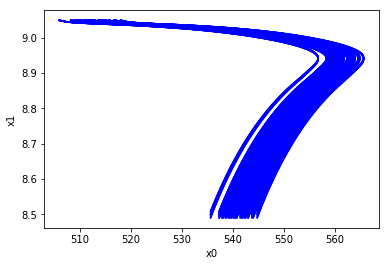

/home/manishg/Research/NExG/eval-emsoft/eval-gr/dconfigs_inv/d_object_GCAS
10
Avg vp is 0.008072905853658567
Max vp is 0.014200777263839847
/home/manishg/Research/NExG/eval-emsoft/eval-gr
Gradient: True
(148200, 7)
(133380, 7)
(133380, 2)
normalized

Setting the activation function to default - ReLU.

***** learning module *** 7
***** learning module *** 2
Epoch 1/30
2085/2085 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.7574 - mse: 0.2449
Epoch 2/30
2085/2085 [==============================] - 7s 3ms/step - loss: 0.3063 - accuracy: 0.8112 - mse: 0.1766
Epoch 3/30
2085/2085 [==============================] - 8s 4ms/step - loss: 0.2786 - accuracy: 0.8268 - mse: 0.1558
Epoch 4/30
2085/2085 [==============================] - 7s 3ms/step - loss: 0.2624 - accuracy: 0.8362 - mse: 0.1445
Epoch 5/30
2085/2085 [==============================] - 7s 3ms/step - loss: 0.2508 - accuracy: 0.8445 - mse: 0.1355
Epoch 6/30
2085/2085 [==============================] - 7s 3m

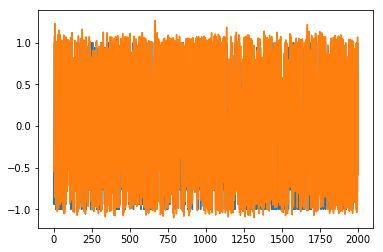

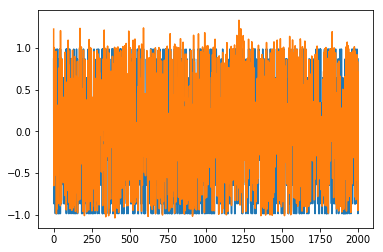

(14820, 2)
(14820, 2)


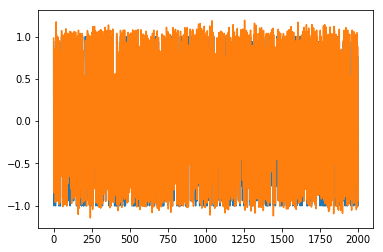

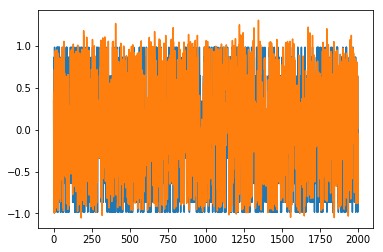

In [2]:
import matplotlib
%matplotlib inline

import os
nxg_path = os.environ.get('NXG_PATH')
print(nxg_path)

import sys
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
aerobench_path = nxg_path + 'AeroBenchVVPython/code/'
sys.path.append(aerobench_path)

from learningModule import DataConfiguration, CreateTrainNN
from aerobench.run_f16_sim import run_f16_sim
from aerobench.examples.gcas.gcas_autopilot import GcasAutopilot

epochs = 30
dynamics = 'GCAS'
dataObject = DataConfiguration(dynamics=dynamics, gradient_run=True)
dataObject.setStepSize(1/30)
dataObject.setSteps(120)
dataObject.setSamples(30)
dataObject.setLowerBound([535.0, 8.5])
dataObject.setUpperBound([545.0, 8.5])
dataObject.generateTrajectories(scaling=0.01, dump_i_states=True)
dataObject.showTrajectories(xindex=0, yindex=1, dimwise=False)
dataObject.createData(jumps=[1,2,5,7,11,13,17,19])
    
nnObject1 = CreateTrainNN(dynamics=dynamics, dnn_rbf='RBF')
nnObject1.createInputOutput(data_object = dataObject, inp_vars=['x','xp','vp','t'], out_vars=['v'])
nnObject1.setEpochs(epochs)
nnObject1.trainTestNN(optim='SGD', loss_fn='mae', layers=1, neurons=512)

In [7]:
import matplotlib
%matplotlib inline
import numpy as np
import random

import os
import sys
nxg_path = os.environ.get('NXG_PATH')
sys.path.append(nxg_path + 'core')
sys.path.append(nxg_path + 'configuration-setup')
sys.path.append(nxg_path + 'core/rrtAlgorithms/src/')

from evaluation_isen import EvaluationInvSen

evalObject = EvaluationInvSen(dynamics='GCAS')
evalObject.setSimsBound(30)
dataObject = evalObject.setDataObject()
dataObject.setLowerBound([535.0, 6.5])
dataObject.setUpperBound([545.0, 9.5])

lowerBound = [540, 9.0]
upperBound = [560, 9.5]
evalObject.setUnsafeSet(lowerBound, upperBound)
dest_traj = dataObject.generateTrajectories(samples=1)[0]
print(dest_traj[60], dest_traj[70])
stl_time_interval = [2.0, 3.0]

f_simulations = []
min_dists = []
rel_dists = []
max_iter = 10
idx = 0
while idx < max_iter:
#     dest_traj = dataObject.generateTrajectories(samples=1)[0]
    ref_traj = dataObject.generateTrajectories(samples=1)[0]
    dest = evalObject.generateRandomUnsafeStates(1)
    dests = dest
    evalObject.reachDestInvSen(dests=dests, d_time_steps=stl_time_interval, threshold=0.0, 
                        correction_steps = [2], scaling_factors=[0.5], i_state=[ref_traj[0]])
    f_sims = evalObject.getFSimulations()
    min_dist = evalObject.getFDistance()
    rel_dist = evalObject.getFRelDistance()
    if f_sims > 1 and rel_dist < 1.0:
        f_simulations.append(f_sims)
        min_dists.append(min_dist)
        rel_dists.append(rel_dist)
    idx = idx + 1
    print("idx **** " + str(idx))
# print(f_iterations, min_rel_dists)
print(np.sum(f_simulations)/len(f_simulations))
print(np.sum(min_dists)/len(min_dists))
print(np.sum(rel_dists)/len(rel_dists))
print(np.max(f_simulations))

/home/manishg/Research/NExG//eval-emsoft/eval-gr/dconfigs_inv/d_object_GCAS.txt
[558.59431069   9.01310175] [551.16686515   9.02614932]
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_GCAS_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 0.18297630462638784
*********** Initial sample falsified ************
Best robustness -0.49993719969643813
Final distance 0.18297630462638784
Final simulation: 1
Time taken: 0.0001423358917236328
idx **** 1
/home/manishg/Research/NExG//eval-emsoft/eval-gr/models/model_vp_2_v_GCAS_RBF_1_512_ReLU.h5
[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
60
Norm status: True
True inv sen: None
***** path idx 0 s_factor 0.5 correction steps 2
Starting distance: 4.0491272991807

KeyboardInterrupt: 